In [1]:
# Run magic commands first

%load_ext autoreload
%autoreload 2
%cd ..

/Users/kevinvu/Root/Projects/housing-nyc


In [2]:
from geopandas import read_file
import osmnx as ox

def bbox_ox(bbox):
    lng_max, lat_min, lng_min, lat_max = bbox
    return (lat_max, lat_min, lng_min, lng_max)

# Load graph

## from gpkg

In [3]:
path = 'notebooks/data/nycwalk.gpkg'
nodes = read_file(path, layer='nodes').set_index('osmid')
edges = read_file(path, layer='edges').set_index(['u', 'v', 'key'])
G = ox.graph_from_gdfs(nodes, edges)

took about 5 mins

## from graphml
using osmnx

In [ ]:
path = 'notebooks/data/'
G_graphml = ox.load_graphml(path + 'nycwalk.graphml')

# Goal: explore osmnx

## nearest node

In [4]:
coord = (-73.918479,40.766950)
bbox = (-73.9406,40.7570,-73.8910,40.7788)
n_nodes = ox.nearest_nodes(G, *coord, return_dist=True)

In [8]:
n_nodes

(6406731645, 27.2184017008932)

In [5]:
G_proj = ox.project_graph(G)

In [10]:
len(G.nodes)

609344

In [22]:
G.nodes[n_nodes[0]]

{'y': 40.7668997, 'x': -73.9181627, 'street_count': 2}

In [18]:
G_trunc = ox.truncate.truncate_graph_bbox(G, *bbox_ox(bbox))

In [19]:
len(G_trunc.nodes)

10647

In [20]:
G_trunc_proj = ox.project_graph(G_trunc)

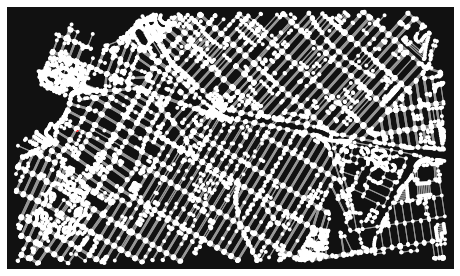

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [21]:
nc = ['r' if node == n_nodes[0] else 'w' for node in G_trunc.nodes]
ox.plot_graph(G_trunc_proj, node_color=nc)

## folium

can use *folium* to build a leaflet map of graph

## stats

In [35]:
stats = ox.basic_stats(G)

In [36]:
stats.keys()

dict_keys(['n', 'm', 'k_avg', 'edge_length_total', 'edge_length_avg', 'streets_per_node_avg', 'streets_per_node_counts', 'streets_per_node_proportions', 'intersection_count', 'street_length_total', 'street_segment_count', 'street_length_avg', 'circuity_avg', 'self_loop_proportion'])

In [38]:
import pandas as pd

pd.DataFrame(stats).to_csv(path + 'results_nycwalk_stats.csv')

In [41]:
stats['streets_per_node_counts']

{0: 0, 1: 28657, 2: 363201, 3: 109788, 4: 106535, 5: 1053, 6: 102, 7: 6, 8: 2}

In [42]:
stats['streets_per_node_proportions']

{0: 0.0,
 1: 0.047029264257956095,
 2: 0.5960524761054511,
 3: 0.18017408885621258,
 4: 0.17483556086545532,
 5: 0.0017280879109337255,
 6: 0.0001673931309736372,
 7: 9.846654763155131e-06,
 8: 3.2822182543850434e-06}